# Build Year & Tenure

## Pre-Operation

In [1]:
import os
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from utils import preprocess

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
DATA_DIR = 'data/'
IMG_DIR = 'img/'
TRAIN_FILE = DATA_DIR + 'train.csv'
TEST_FILE = DATA_DIR + 'train.csv'
AUX_DATA_DIR = DATA_DIR + 'auxiliary-data/'

In [4]:
df = pd.read_csv(TRAIN_FILE, index_col = False)
df.head()

,listing_id,title,address,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,...,furnishing,available_unit_types,total_num_units,property_details_url,lat,lng,elevation,subzone,planning_area,price
0,122881,hdb flat for sale in 866 yishun street 81,sembawang / yishun (d27),866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,...,unspecified,NaN,116.0,https://www.99.co/singapore/hdb/866-yishun-str...,1.414399,103.837196,0,yishun south,yishun,514500.0
1,259374,hdb flat for sale in 506b serangoon north aven...,hougang / punggol / sengkang (d19),hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,...,unspecified,"1, 2, 3, 4, 5, 6 br",NaN,https://www.99.co/singapore/hdb/hdbserangoon-e...,1.372597,103.875625,0,serangoon north,serangoon,995400.0
2,665422,4 bed condo for sale in meyerhouse,128 meyer road,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,...,partial,"studio, 3, 4, 5, 6 br",56.0,https://www.99.co/singapore/condos-apartments/...,1.298773,103.895798,0,mountbatten,marine parade,8485000.0
3,857699,3 bed condo for sale in leedon green,26 leedon heights,leedon green,Condo,freehold,2023.0,3.0,2.0,958,...,partial,"studio, 1, 2, 3, 4 br",638.0,https://www.99.co/singapore/condos-apartments/...,1.312364,103.803271,0,farrer court,bukit timah,2626000.0
4,216061,2 bed condo for sale in one bernam,1 bernam street,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,...,unspecified,"studio, 1, 2, 3, 4, 5 br",351.0,https://www.99.co/singapore/condos-apartments/...,1.273959,103.843635,0,anson,downtown core,1764000.0


## Data clean

In previous assumption, I hope to calculate the holding time of the property from the present, that is, built year + tenure - 2022.

However, since I fill the nan value by fillna method, the assignment of the nan value is random, the secondart calculation result will have a huge error, so I give up this thought.

In [5]:
df_no_nan = df.copy()

# drop some columns directly
droplist = ['listing_id', 'title', 'address', 'floor_level', 
            'total_num_units', 'property_details_url', 'elevation','available_unit_types',
            'subzone','planning_area']

df_no_nan.drop(columns=droplist, inplace=True)
df_no_nan.head()

,property_name,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,lat,lng,price
0,866 yishun street 81,hdb 4 rooms,NaN,1988.0,3.0,2.0,1115,unspecified,1.414399,103.837196,514500.0
1,hdb-serangoon estate,hdb,99-year leasehold,1992.0,4.0,2.0,1575,unspecified,1.372597,103.875625,995400.0
2,meyerhouse,condo,freehold,2022.0,4.0,6.0,3070,partial,1.298773,103.895798,8485000.0
3,leedon green,Condo,freehold,2023.0,3.0,2.0,958,partial,1.312364,103.803271,2626000.0
4,one bernam,condo,99-year leasehold,2026.0,2.0,1.0,732,unspecified,1.273959,103.843635,1764000.0


In [6]:
print(df_no_nan['built_year'].value_counts())

2023.0    2154
2025.0    1534
2024.0    1476
2022.0    1168
2017.0    1164
          ... 
1991.0      37
1971.0      32
2028.0      31
1963.0       8
1968.0       6
Name: built_year, Length: 63, dtype: int64


In [7]:
# Handle 'property_type' column (for test)
df_no_nan['property_type'] = df_no_nan['property_type'].astype(str)
property_types = []
for i in df_no_nan['property_type']:
    if 'hdb ' in i:
        property_types.append('hdb')
    else:
        if i.istitle():
            property_types.append(i.lower())
        else:
            property_types.append(i)

df_no_nan['property_type'] = pd.Series(property_types)

In [8]:
preprocess.normalize_tenure(df_no_nan)

In [9]:
print(df_no_nan['tenure'].value_counts())
print("na number of tenure column is", df_no_nan['tenure'].isna().sum())

99          12705
freehold     6442
999           440
103           189
110            25
956            12
946            10
929             2
102             2
100             1
947             1
Name: tenure, dtype: int64
na number of tenure column is 425


In [10]:
tenure_na = df_no_nan[df_no_nan['tenure'].isna()].groupby('property_name')
print(tenure_na.size())

property_name
1 lorong lew lian           2
103c edgefield plains       1
106 lengkong tiga           1
110d punggol field          2
129 bedok north street 2    1
                           ..
spring residences           2
spring waters villas        1
sunny terrace               1
the green collection        2
woodview villas             2
Length: 167, dtype: int64


In [11]:
preprocess.handle_years_and_tenure_nan(df_no_nan, 'tenure')

99          12976
freehold     6584
999           447
103           194
110            25
956            12
946            10
929             2
102             2
100             1
947             1
Name: tenure, dtype: int64
na number of tenure  column is 0


In [65]:
#ffill (choose one)

df_no_nan['tenure'].fillna(method='ffill', inplace=True)
print(df_no_nan['tenure'].value_counts())
print("na number of tenure column is", df_no_nan['tenure'].isna().sum())

99          12976
freehold     6584
999           447
103           194
110            25
956            12
946            10
929             2
102             2
100             1
947             1
Name: tenure, dtype: int64
na number of tenure column is 0


In [43]:
#bfill

df_no_nan['tenure'].fillna(method='bfill', inplace=True)
print(df_no_nan['tenure'].value_counts())
print("na number of tenure column is", df_no_nan['tenure'].isna().sum())

99          12962
freehold     6595
999           450
103           192
110            25
956            13
946            11
929             2
102             2
100             1
947             1
Name: tenure, dtype: int64
na number of tenure column is 0


In [67]:
print(df_no_nan['built_year'].value_counts())
print("na number of built_year column is", df_no_nan['built_year'].isna().sum())

2023.0    2154
2025.0    1534
2024.0    1476
2022.0    1168
2017.0    1164
          ... 
1991.0      37
1971.0      32
2028.0      31
1963.0       8
1968.0       6
Name: built_year, Length: 63, dtype: int64
na number of built_year column is 922


In [69]:
#ffill (choose one)

df_no_nan['built_year'].fillna(method='ffill', inplace=True)
print(df_no_nan['built_year'].value_counts())
print("na number of built_year column is", df_no_nan['built_year'].isna().sum())

# #bfill

# df_no_nan['built_year'].fillna(method='bfill', inplace=True)
# print(df_no_nan['built_year'].value_counts())
# print("na number of built_year column is", df_no_nan['built_year'].isna().sum())


2023.0    2247
2025.0    1613
2024.0    1555
2017.0    1223
2022.0    1213
          ... 
1991.0      37
1971.0      34
2028.0      31
1963.0       9
1968.0       6
Name: built_year, Length: 63, dtype: int64
na number of built_year column is 0


## Data Visualization

<AxesSubplot:title={'center':'The Number Of Property With Built Year'}, xlabel='built year', ylabel='property number'>

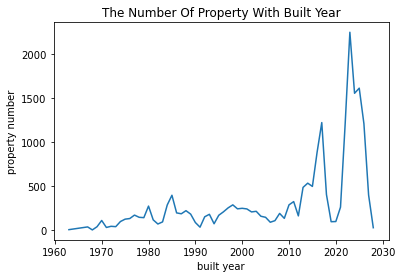

In [96]:
df_no_nan.groupby('built_year').size().plot(xlabel = "Built Year", ylabel = "Property Number", title = "The Number Of Property With Built Year")

<AxesSubplot:title={'center':'The Number Of Property With Different Tenure'}, xlabel='Tenure Year', ylabel='Property Number'>

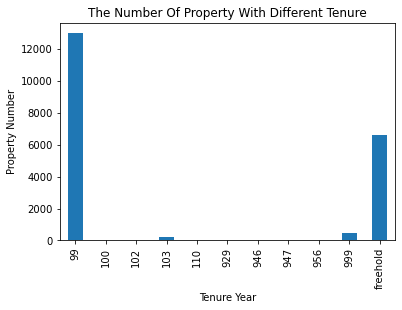

In [97]:
df_no_nan.groupby('tenure').size().plot(xlabel = "Tenure Year", ylabel = "Property Number", kind = 'bar', title = "The Number Of Property With Different Tenure")